<a href="https://colab.research.google.com/github/DipeshDhote/CNN_Projects/blob/main/PlantDiseasDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plant Disease Detection USING VGG16**

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d "tushar5harma/plant-village-dataset-updated"

Dataset URL: https://www.kaggle.com/datasets/tushar5harma/plant-village-dataset-updated
License(s): CC0-1.0
100% 1.00G/1.00G [00:52<00:00, 19.6MB/s]
100% 1.00G/1.00G [00:52<00:00, 20.7MB/s]


In [3]:
!unzip /content/plant-village-dataset-updated.zip

Streaming output truncated to the last 5000 lines.
  inflating: Tomato/Train/Septoria Leaf Spot/a3938779-9d9f-4e45-a397-7b5abd13f6ba___JR_Sept.L.S 2700.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a4467299-5237-45f5-bb9b-9fd69f7a2b1a___Matt.S_CG 7719.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a45b192c-f31e-4ca1-bf4a-10ff1060e658___Matt.S_CG 7512.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a45bce54-4c25-4d5d-a9a9-fbc76436844c___Matt.S_CG 6523.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a46ff722-2186-4645-9018-01e8e20cfa2a___Matt.S_CG 6511.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a4880706-e191-43ff-a5a7-bd0f0c03aa2d___Keller.St_CG 1851.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a494e2ac-9dbe-47e5-9963-3e99f8eb9d2e___Matt.S_CG 6062.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a49c7f28-4b67-4d95-b79b-26a52dc8b9e5___Matt.S_CG 7583.JPG  
  inflating: Tomato/Train/Septoria Leaf Spot/a5bf2855-754e-4661-86b1-a86f0974cd30___JR_Sept.L.S 2574.JPG

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# import pytorch library
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

from sklearn.model_selection import train_test_split

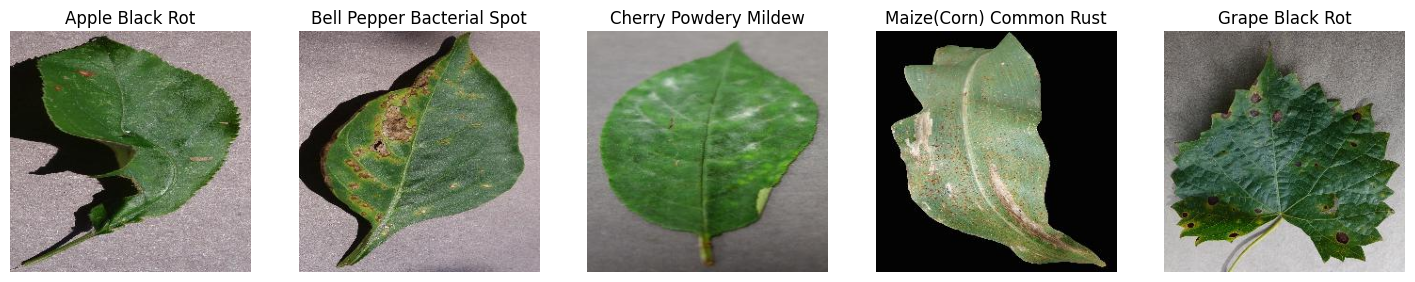

In [63]:
apple_img = mpimg.imread(f"/content/Apple/Train/Black Rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG")
bell_img = mpimg.imread(f"/content/Bell Pepper/Train/Bacterial Spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG")
cherry_img = mpimg.imread(f"/content/Cherry/Train/Powdery Mildew/0325a93a-4fa1-4eae-a6a9-fc6baa82ca7f___FREC_Pwd.M 0434_flipLR.JPG")
maize_img = mpimg.imread(f"/content/Corn (Maize)/Train/Common Rust /RS_Rust 1563.JPG")
grape_img = mpimg.imread(f"/content/Grape/Train/Black Rot/003d09ef-e16c-4e8a-badf-847d46cb3dc0___FAM_B.Rot 3184_flipLR.JPG")


plt.figure(figsize=(18,4))

# display image 1
plt.subplot(1,5,1)
plt.imshow(apple_img)
plt.axis('off')
plt.title("Apple Black Rot")

# display image 2
plt.subplot(1,5,2)
plt.imshow(bell_img)
plt.axis('off')
plt.title("Bell Pepper Bacterial Spot")

# display image 3
plt.subplot(1,5,3)
plt.imshow(cherry_img)
plt.axis('off')
plt.title("Cherry Powdery Mildew")

# display image 4
plt.subplot(1,5,4)
plt.imshow(maize_img)
plt.axis('off')
plt.title("Maize(Corn) Common Rust")

# display image 5
plt.subplot(1,5,5)
plt.imshow(grape_img)
plt.axis('off')
plt.title("Grape Black Rot")

plt.show() # Show all subplots at once


### Prepare Dataset

In [64]:
import os

os.listdir("/content/")

['.config',
 'Corn (Maize)',
 'Bell Pepper',
 'Peach',
 'Strawberry',
 'Potato',
 'Apple',
 'plant-village-dataset-updated.zip',
 'Tomato',
 'Grape',
 'Cherry',
 'sample_data']

In [65]:
fl = ['Strawberry',
 'Corn (Maize)',
 'Potato',
 'Tomato',
 'Peach',
 'Cherry',
 'Bell Pepper',
 'Grape',
 'Apple',]

/content/Cherry/Train/Powdery Mildew

In [66]:
list_of_dir_path = []
for fruit_or_veg in  range(len(fl)):
  train_path = f"/content/{fl[fruit_or_veg]}/Train/"
  for category in(os.listdir(train_path)):
    category_path = os.path.join(train_path,category)
    print(category_path)
    list_of_dir_path.append(category_path)

/content/Strawberry/Train/Healthy
/content/Strawberry/Train/Leaf Scorch
/content/Corn (Maize)/Train/Common Rust 
/content/Corn (Maize)/Train/Healthy
/content/Corn (Maize)/Train/Cercospora Leaf Spot
/content/Corn (Maize)/Train/Northern Leaf Blight
/content/Potato/Train/Healthy
/content/Potato/Train/Late Blight
/content/Potato/Train/Early Blight
/content/Tomato/Train/Yellow Leaf Curl Virus
/content/Tomato/Train/Septoria Leaf Spot
/content/Tomato/Train/Healthy
/content/Tomato/Train/Bacterial Spot
/content/Tomato/Train/Late Blight
/content/Tomato/Train/Early Blight
/content/Peach/Train/Healthy
/content/Peach/Train/Bacterial Spot
/content/Cherry/Train/Healthy
/content/Cherry/Train/Powdery Mildew
/content/Bell Pepper/Train/Healthy
/content/Bell Pepper/Train/Bacterial Spot
/content/Grape/Train/Healthy
/content/Grape/Train/Leaf Blight
/content/Grape/Train/Black Rot
/content/Grape/Train/Esca (Black Measles)
/content/Apple/Train/Healthy
/content/Apple/Train/Black Rot
/content/Apple/Train/Apple S

In [67]:
list_of_dir_path

['/content/Strawberry/Train/Healthy',
 '/content/Strawberry/Train/Leaf Scorch',
 '/content/Corn (Maize)/Train/Common Rust ',
 '/content/Corn (Maize)/Train/Healthy',
 '/content/Corn (Maize)/Train/Cercospora Leaf Spot',
 '/content/Corn (Maize)/Train/Northern Leaf Blight',
 '/content/Potato/Train/Healthy',
 '/content/Potato/Train/Late Blight',
 '/content/Potato/Train/Early Blight',
 '/content/Tomato/Train/Yellow Leaf Curl Virus',
 '/content/Tomato/Train/Septoria Leaf Spot',
 '/content/Tomato/Train/Healthy',
 '/content/Tomato/Train/Bacterial Spot',
 '/content/Tomato/Train/Late Blight',
 '/content/Tomato/Train/Early Blight',
 '/content/Peach/Train/Healthy',
 '/content/Peach/Train/Bacterial Spot',
 '/content/Cherry/Train/Healthy',
 '/content/Cherry/Train/Powdery Mildew',
 '/content/Bell Pepper/Train/Healthy',
 '/content/Bell Pepper/Train/Bacterial Spot',
 '/content/Grape/Train/Healthy',
 '/content/Grape/Train/Leaf Blight',
 '/content/Grape/Train/Black Rot',
 '/content/Grape/Train/Esca (Black

In [68]:
for i in (os.listdir('/content/Strawberry/Train/Healthy')):
  print(f"/content/Strawberry/Train/Healthy/{i}")
  break

/content/Strawberry/Train/Healthy/fd929b1c-3f0d-4d0e-96f2-2f99bcb186d9___RS_HL 4728_new30degFlipLR.JPG


In [69]:
full_path = []
for path in list_of_dir_path:
    for root, _, files in os.walk(path):  # `_` ignores dirs if not needed
        for file in files:
            file_path = os.path.join(root, file)  # Get full file path
            full_path.append(file_path)

In [70]:
list_of_dir_path

['/content/Strawberry/Train/Healthy',
 '/content/Strawberry/Train/Leaf Scorch',
 '/content/Corn (Maize)/Train/Common Rust ',
 '/content/Corn (Maize)/Train/Healthy',
 '/content/Corn (Maize)/Train/Cercospora Leaf Spot',
 '/content/Corn (Maize)/Train/Northern Leaf Blight',
 '/content/Potato/Train/Healthy',
 '/content/Potato/Train/Late Blight',
 '/content/Potato/Train/Early Blight',
 '/content/Tomato/Train/Yellow Leaf Curl Virus',
 '/content/Tomato/Train/Septoria Leaf Spot',
 '/content/Tomato/Train/Healthy',
 '/content/Tomato/Train/Bacterial Spot',
 '/content/Tomato/Train/Late Blight',
 '/content/Tomato/Train/Early Blight',
 '/content/Peach/Train/Healthy',
 '/content/Peach/Train/Bacterial Spot',
 '/content/Cherry/Train/Healthy',
 '/content/Cherry/Train/Powdery Mildew',
 '/content/Bell Pepper/Train/Healthy',
 '/content/Bell Pepper/Train/Bacterial Spot',
 '/content/Grape/Train/Healthy',
 '/content/Grape/Train/Leaf Blight',
 '/content/Grape/Train/Black Rot',
 '/content/Grape/Train/Esca (Black

In [71]:
from pathlib import Path
from collections import defaultdict

gh = defaultdict(list)  # Use defaultdict to store multiple images per label

for i in full_path:
    if "Strawberry" in i and "Leaf Scorch" in i:
        gh["Strawberry_LeafScorch"].append(i)
    elif "Strawberry" in i and "Healthy" in i:
        gh["Strawberry_Healthy"].append(i)

    elif "Corn (Maize)" in i and "Healthy" in i:
        gh["Corn_Healthy"].append(i)
    elif "Corn (Maize)" in i and "Northern Leaf Blight" in i:
        gh["Corn_NorthernLeafBlight"].append(i)
    elif "Corn (Maize)" in i and "Cercospora Leaf Spot" in i:
        gh["Corn_CercosporaLeafSpot"].append(i)
    elif "Corn (Maize)" in i and "Common Rust" in i:
        gh["Corn_CommonRust"].append(i)

    elif "Potato" in i and "Healthy" in i:
        gh["Potato_Healthy"].append(i)
    elif "Potato" in i and "Late Blight" in i:
        gh["Potato_LateBlight"].append(i)
    elif "Potato" in i and "Early Blight" in i:
        gh["Potato_EarlyBlight"].append(i)

    elif "Tomato" in i and "Healthy" in i:
        gh["Tomato_Healthy"].append(i)
    elif "Tomato" in i and "Late Blight" in i:
        gh["Tomato_LateBlight"].append(i)
    elif "Tomato" in i and "Early Blight" in i:
        gh["Tomato_EarlyBlight"].append(i)
    elif "Tomato" in i and "Yellow Leaf Curl Virus" in i:
        gh["Tomato_YellowLeafCurlVirus"].append(i)
    elif "Tomato" in i and "Septoria Leaf Spot" in i:
        gh["Tomato_SeptoriaLeafSpot"].append(i)
    elif "Tomato" in i and "Bacterial Spot" in i:
        gh["Tomato_BacterialSpot"].append(i)

    elif "Peach" in i and "Healthy" in i:
        gh["Peach_Healthy"].append(i)
    elif "Peach" in i and "Bacterial Spot" in i:
        gh["Peach_BacterialSpot"].append(i)

    elif "Cherry" in i and "Healthy" in i:
        gh["Cherry_Healthy"].append(i)
    elif "Cherry" in i and "Powdery Mildew" in i:
        gh["Cherry_PowderyMildew"].append(i)

    elif "Bell Pepper" in i and "Healthy" in i:
        gh["BellPepper_Healthy"].append(i)
    elif "Bell Pepper" in i and "Bacterial Spot" in i:
        gh["BellPepper_BacterialSpot"].append(i)

    elif "Grape" in i and "Healthy" in i:
        gh["Grape_Healthy"].append(i)
    elif "Grape" in i and "Leaf Blight" in i:
        gh["Grape_LeafBlight"].append(i)
    elif "Grape" in i and "Black Rot" in i:
        gh["Grape_BlackRot"].append(i)
    elif "Grape" in i and "Esca (Black Measles)" in i:
        gh["Grape_BlackMeasles"].append(i)

    elif "Apple" in i and "Healthy" in i:
        gh["Apple_Healthy"].append(i)
    elif "Apple" in i and "Black Rot" in i:
        gh["Apple_BlackRot"].append(i)
    elif "Apple" in i and "Cedar Apple Rust" in i:
        gh["Apple_CedarAppleRust"].append(i)
    elif "Apple" in i and "Apple Scab" in i:
        gh["Apple_AppleScab"].append(i)

    else:
        gh["Unknown"].append(i)

# Print dictionary to verify
for key, value in gh.items():
    print(f"{key}: {len(value)} images")


Strawberry_Healthy: 1824 images
Strawberry_LeafScorch: 1774 images
Corn_CommonRust: 1907 images
Corn_Healthy: 1859 images
Corn_CercosporaLeafSpot: 1642 images
Corn_NorthernLeafBlight: 1908 images
Potato_Healthy: 1824 images
Potato_LateBlight: 1939 images
Potato_EarlyBlight: 1939 images
Tomato_YellowLeafCurlVirus: 1961 images
Tomato_SeptoriaLeafSpot: 1748 images
Tomato_Healthy: 1926 images
Tomato_BacterialSpot: 1702 images
Tomato_LateBlight: 1851 images
Tomato_EarlyBlight: 1920 images
Peach_Healthy: 1728 images
Peach_BacterialSpot: 1838 images
Cherry_Healthy: 1826 images
Cherry_PowderyMildew: 1683 images
BellPepper_Healthy: 1988 images
BellPepper_BacterialSpot: 1913 images
Grape_Healthy: 1692 images
Grape_LeafBlight: 1722 images
Grape_BlackRot: 1888 images
Grape_BlackMeasles: 1920 images
Apple_Healthy: 2008 images
Apple_BlackRot: 1987 images
Apple_AppleScab: 2016 images
Apple_CedarAppleRust: 1760 images


In [72]:
import pandas as pd
from pathlib import Path

# Initialize dictionary with empty lists
gh = {
    "Strawberry_LeafScorch": [],
    "Strawberry_Healthy": [],
    "Corn_Healthy": [],
    "Corn_NorthernLeafBlight": [],
    "Corn_CercosporaLeafSpot": [],
    "Corn_CommonRust": [],
    "Potato_Healthy": [],
    "Potato_LateBlight": [],
    "Potato_EarlyBlight": [],
    "Tomato_Healthy": [],
    "Tomato_LateBlight": [],
    "Tomato_EarlyBlight": [],
    "Tomato_YellowLeafCurlVirus": [],
    "Tomato_SeptoriaLeafSpot": [],
    "Tomato_BacterialSpot": [],
    "Peach_Healthy": [],
    "Peach_BacterialSpot": [],
    "Cherry_Healthy": [],
    "Cherry_PowderyMildew": [],
    "BellPepper_Healthy": [],
    "BellPepper_BacterialSpot": [],
    "Grape_Healthy": [],
    "Grape_LeafBlight": [],
    "Grape_BlackRot": [],
    "Grape_BlackMeasles": [],
    "Apple_Healthy": [],
    "Apple_BlackRot": [],
    "Apple_CedarAppleRust": [],
    "Apple_AppleScab": [],
    "Unknown": []
}


# Iterate over images and categorize
for i in full_path:
    parts = i.split('/')

    if "Strawberry" in parts and 'Leaf Scorch' in parts:
        gh["Strawberry_LeafScorch"].append(i)
    elif "Strawberry" in parts and 'Healthy' in parts:
        gh["Strawberry_Healthy"].append(i)
    elif "Corn (Maize)" in parts and 'Healthy' in parts:
        gh["Corn_Healthy"].append(i)
    elif "Corn (Maize)" in parts and 'Northern Leaf Blight' in parts:
        gh["Corn_NorthernLeafBlight"].append(i)
    elif "Corn (Maize)" in parts and 'Cercospora Leaf Spot' in parts:
        gh["Corn_CercosporaLeafSpot"].append(i)
    elif "Corn (Maize)" in parts and 'Common Rust ' in parts:
        gh["Corn_CommonRust"].append(i)
    elif "Potato" in parts and 'Healthy' in parts:
        gh["Potato_Healthy"].append(i)
    elif "Potato" in parts and 'Late Blight' in parts:
        gh["Potato_LateBlight"].append(i)
    elif "Potato" in parts and 'Early Blight' in parts:
        gh["Potato_EarlyBlight"].append(i)
    elif "Tomato" in parts and 'Healthy' in parts:
        gh["Tomato_Healthy"].append(i)
    elif "Tomato" in parts and 'Late Blight' in parts:
        gh["Tomato_LateBlight"].append(i)
    elif "Tomato" in parts and 'Early Blight' in parts:
        gh["Tomato_EarlyBlight"].append(i)
    elif "Tomato" in parts and 'Yellow Leaf Curl Virus' in parts:
        gh["Tomato_YellowLeafCurlVirus"].append(i)
    elif "Tomato" in parts and 'Septoria Leaf Spot' in parts:
        gh["Tomato_SeptoriaLeafSpot"].append(i)
    elif "Tomato" in parts and 'Bacterial Spot' in parts:
        gh["Tomato_BacterialSpot"].append(i)
    elif "Peach" in parts and 'Healthy' in parts:
        gh["Peach_Healthy"].append(i)
    elif "Peach" in parts and 'Bacterial Spot' in parts:
        gh["Peach_BacterialSpot"].append(i)
    elif "Cherry" in parts and 'Healthy' in parts:
        gh["Cherry_Healthy"].append(i)
    elif "Cherry" in parts and 'Powdery Mildew' in parts:
        gh["Cherry_PowderyMildew"].append(i)
    elif "Bell Pepper" in parts and 'Healthy' in parts:
        gh["BellPepper_Healthy"].append(i)
    elif "Bell Pepper" in parts and 'Bacterial Spot' in parts:
        gh["BellPepper_BacterialSpot"].append(i)
    elif "Grape" in parts and 'Healthy' in parts:
        gh["Grape_Healthy"].append(i)
    elif "Grape" in parts and 'Leaf Blight' in parts:
        gh["Grape_LeafBlight"].append(i)
    elif "Grape" in parts and 'Black Rot' in parts:
        gh["Grape_BlackRot"].append(i)
    elif "Grape" in parts and 'Esca (Black Measles)' in parts:
        gh["Grape_BlackMeasles"].append(i)
    elif "Apple" in parts and 'Healthy' in parts:
        gh["Apple_Healthy"].append(i)
    elif "Apple" in parts and 'Black Rot' in parts:
        gh["Apple_BlackRot"].append(i)
    elif "Apple" in parts and 'Cedar Apple Rust' in parts:
        gh["Apple_CedarAppleRust"].append(i)
    elif "Apple" in parts and 'Apple Scab' in parts:
        gh["Apple_AppleScab"].append(i)
    else:
        gh["Unknown"].append(i)

# Convert dictionary to DataFrame
df = pd.DataFrame([(category, img) for category, images in gh.items() for img in images],
                  columns=["Category", "Image_Path"])


In [73]:
df.head()

,Category,Image_Path
0,Strawberry_LeafScorch,/content/Strawberry/Train/Leaf Scorch/c50d2ba0...
1,Strawberry_LeafScorch,/content/Strawberry/Train/Leaf Scorch/08d4f54d...
2,Strawberry_LeafScorch,/content/Strawberry/Train/Leaf Scorch/0b440206...
3,Strawberry_LeafScorch,/content/Strawberry/Train/Leaf Scorch/c50d2ba0...
4,Strawberry_LeafScorch,/content/Strawberry/Train/Leaf Scorch/5e4669c3...


In [74]:
df.Category.nunique()

29

In [75]:
df.Image_Path

,Image_Path
0,/content/Strawberry/Train/Leaf Scorch/c50d2ba0...
1,/content/Strawberry/Train/Leaf Scorch/08d4f54d...
2,/content/Strawberry/Train/Leaf Scorch/0b440206...
3,/content/Strawberry/Train/Leaf Scorch/c50d2ba0...
4,/content/Strawberry/Train/Leaf Scorch/5e4669c3...
...,...
53688,/content/Apple/Train/Apple Scab/eb3fa649-d717-...
53689,/content/Apple/Train/Apple Scab/fc9c12dc-1bdb-...
53690,/content/Apple/Train/Apple Scab/b2567b00-d781-...
53691,/content/Apple/Train/Apple Scab/ef40de8f-19ee-...


In [76]:
df.Category.value_counts()

,count
Category,
Apple_AppleScab,2016
Apple_Healthy,2008
BellPepper_Healthy,1988
Apple_BlackRot,1987
Tomato_YellowLeafCurlVirus,1961
Potato_EarlyBlight,1939
Potato_LateBlight,1939
Tomato_Healthy,1926
Grape_BlackMeasles,1920


### Split data into train & test

In [77]:
X = df.Image_Path
y = df.Category

In [78]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [80]:
# Convert labels into numerical format
label_encoder = LabelEncoder()


y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [81]:
y_train

,Category
40500,Grape_LeafBlight
26980,Tomato_BacterialSpot
28012,Peach_Healthy
12214,Potato_Healthy
32665,Cherry_Healthy
...,...
11284,Potato_Healthy
44732,Grape_BlackMeasles
38158,BellPepper_BacterialSpot
860,Strawberry_LeafScorch


### Set parameters


In [82]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [83]:
### Move into GPU
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [84]:
from torchvision.transforms import transforms

custom_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize( mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

In [85]:
from PIL import Image

In [86]:
image = Image.open('/content/Potato/Train/Early Blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')
image.show()

In [87]:
# Convert to NumPy array
image_array = np.array(image)

# Print shape
print(image_array.shape)  # (height, width, channels)

(256, 256, 3)


In [88]:
i = image.resize((28,28))
k = np.array(i)
k.shape

(28, 28, 3)

### Create custom Data class

In [124]:
from PIL import Image
import numpy as np

class CustomDataset(Dataset):

  def __init__(self,features,labels,transform):
    self.features = features.reset_index(drop=True)
    self.labels = labels
    self.transform = transform


  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):

    # Read image as a pil
    image = Image.open(self.features[index])

    # Apply transformation
    image = self.transform(image)


    return image,torch.tensor(self.labels[index],dtype=torch.long)

### create object of cusrom data class

In [125]:
# Create custom Data class objects using the encoded labels
train_data = CustomDataset(X_train, y_train_encoded, custom_transform)
test_data = CustomDataset(X_test, y_test_encoded, custom_transform)

### Define DataLoader Object

In [126]:
loaded_train = DataLoader(train_data,batch_size=128,shuffle=True,pin_memory=True)
loaded_test = DataLoader(test_data,batch_size=128,shuffle=False,pin_memory=True)

### Load VGG16 Model

In [127]:
import torchvision.models as models

vgg16 = models.vgg16(pretrained = True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [128]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [129]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [130]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [131]:
# Sqeeze the parameters
for param in vgg16.features.parameters():
  param.requires_grad=False


### Create custom FC Neural Network

In [141]:
vgg16.classifier = nn.Sequential(

    # First Layer
    nn.Linear(in_features=25088, out_features=1024, bias=True),
    nn.BatchNorm1d(1024),  # Batch Norm
    nn.ReLU(),
    nn.Dropout(p = 0.5),  # Dropout

    # Second Layer
    nn.Linear(in_features=1024, out_features=512, bias=True),
    nn.BatchNorm1d(512),  # Batch Norm
    nn.ReLU(),
    nn.Dropout(p=0.5),   # Dropout

    # Third Layer
    nn.Linear(in_features=512, out_features=128, bias=True),
    nn.BatchNorm1d(128),  # Batch Norm
    nn.ReLU(),
    nn.Dropout(p=0.5),   # Dropout

    # output Layer
    nn.Linear(in_features=128, out_features=29, bias=True)

)

In [142]:
# Move model to GPU
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Set other parameters

In [143]:
Learning_rate = 0.0005

epochs = 100

# Loss function
criterian = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(params=vgg16.classifier.parameters(), lr = Learning_rate, weight_decay=1e-4)

### Create Trainning Loop

In [144]:
# training loop

# Initialize an empty list to store losses for each epoch
epoch_losses = []

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in loaded_train:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = vgg16(batch_features)

    print(outputs.shape)
    print(batch_labels.shape)

    # calculate loss
    loss = criterian(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

    break

  avg_loss = total_epoch_loss/len(loaded_train)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

  # Append the average loss for the current epoch to the list
  epoch_losses.append(avg_loss)



torch.Size([128, 29])
torch.Size([128])
Epoch: 1 , Loss: 0.010616651603153773
torch.Size([128, 29])
torch.Size([128])
Epoch: 2 , Loss: 0.010007836988994054
torch.Size([128, 29])
torch.Size([128])
Epoch: 3 , Loss: 0.009664514235087804
torch.Size([128, 29])
torch.Size([128])
Epoch: 4 , Loss: 0.009221756032535009
torch.Size([128, 29])
torch.Size([128])
Epoch: 5 , Loss: 0.009488606736773536
torch.Size([128, 29])
torch.Size([128])
Epoch: 6 , Loss: 0.009248087093943641
torch.Size([128, 29])
torch.Size([128])
Epoch: 7 , Loss: 0.008951558953239805
torch.Size([128, 29])
torch.Size([128])
Epoch: 8 , Loss: 0.008811199239322118
torch.Size([128, 29])
torch.Size([128])
Epoch: 9 , Loss: 0.008645192498252505
torch.Size([128, 29])
torch.Size([128])
Epoch: 10 , Loss: 0.008703986803690592
torch.Size([128, 29])
torch.Size([128])
Epoch: 11 , Loss: 0.008316377089137123
torch.Size([128, 29])
torch.Size([128])
Epoch: 12 , Loss: 0.008294217643283662
torch.Size([128, 29])
torch.Size([128])
Epoch: 13 , Loss: 0.0

In [145]:
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [146]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in loaded_test:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = vgg16(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9071608157184096


In [147]:
from PIL import Image
import torchvision.transforms as transforms

# Load and preprocess the image
def preprocess_image(image_path):
    custom_transform = transforms.Compose([
                        transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize( mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                        ])

    # open image as a PIL image
    image = Image.open(image_path)
    image = custom_transform(image)
    return image

image_path = '/content/Corn (Maize)/Test/Healthy/06ec8081-1520-43e3-bda7-d74467f55992___R.S_HL 7935 copy_flipLR.jpg'
image_tensor = preprocess_image(image_path)


In [148]:
# Perform inference
with torch.no_grad():
    image_tensor = image_tensor.to(device)
    # Remove the extra dimensions using squeeze
    image_tensor = image_tensor.squeeze(0).squeeze(0) # Remove the extra dimensions
    image_tensor = image_tensor.unsqueeze(0)  # Add the batch dimension back

    output = vgg16(image_tensor)

# Get the predicted class
predicted_class_index = torch.argmax(output, dim=1).item()
predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

print(f'Predicted Class: {predicted_label}')

Predicted Class: Corn_Healthy


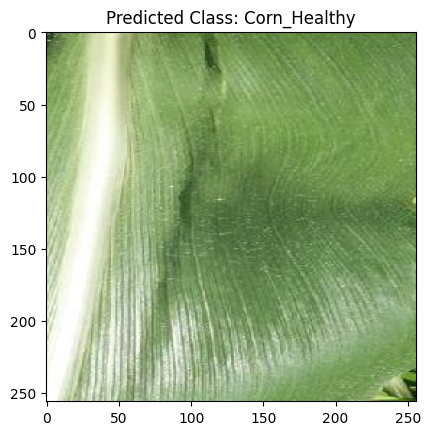

In [149]:
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_label}")
plt.show()

In [150]:
label_encoder.inverse_transform([23])[0]

'Tomato_BacterialSpot'

###  Evaluating the neural network performance

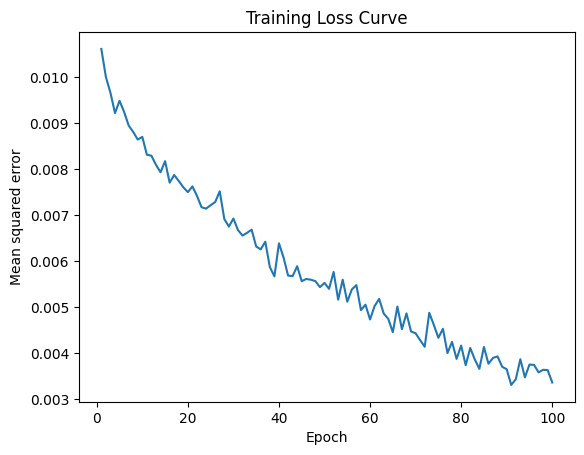

<Figure size 640x480 with 0 Axes>

In [153]:
# Plotting the loss curve
plt.plot(range(1, epochs + 1), epoch_losses)  # X-axis: Epoch number, Y-axis: Loss
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
plt.title('Training Loss Curve')
plt.show()
plt.savefig('/loss.png')

### Save the model

In [155]:
torch.save(vgg16,"PlantDiseaseModel.pth")

In [152]:
import numpy as np

def smooth_curve(values, weight=0.9):
    smoothed_values = []
    last_value = values[0]
    for val in values:
        last_value = weight * last_value + (1 - weight) * val
        smoothed_values.append(last_value)
    return smoothed_values
